# T2 Regressão

# Leila Aparecida da Silva (628166) e Leticia Yumi Katsurada (619973)


# House Sales in King County, USA
(https://www.kaggle.com/harlfoxem/housesalesprediction) 

![king](king_county2.jpg)

`id` - Identificador único para cada casa  
`date` - Data em que a casa foi vendida  
`price` - **Alvo da previsão**   
`bedrooms` - Número de quartos na casa  
`bathrooms` - Número de banheiros/quartos    
`sqft_living` - Metragem quadrada da casa  
`sqft_lot` - Metragem quadrada do lote  
`floors` - Total de pisos (andares) da casa    
`waterfront` - Casa que tem vista para o mar   
`view` - Foi vista  
`condition` - Quão boa é a condição da casa (geral)    
`grade` - Nota geral dada à unidade habitacional, com base no sistema de classificação de King Contry    
`sqft_above` - Metragem quadrada da casa além do porão/fundação  
`sqft_basement` - Metragem quadrada do porão/fundação  
`yr_built` - ano de construção  
`yr_renovated` - Ano em que a casa foi reformada  
`zipcode` - Código postal  
`lat` - Coordenada de Latitude  
`long`- Coordenada de Longitude    
`sqft_living15` - Área da sala de estar em 2015 (implica algumas reformas) isso pode ou não ter afetado a metragem quadrada do lote  
`sqft_lot15` - Tamanho do lote em 2015 (implica algumas reformas)  

#### Square feet -> metros quadrados
1 sqft -> 0,092903 m²

In [2]:
#bibliotecas
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.
import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score

### Exibição de alguns dados do dataset

In [3]:
#leitura do dataset
df = pd.read_csv('kc_house_data.csv',parse_dates = ['date'])
df.sort_values(by='price').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


# Visualização dos dados

In [4]:
df.shape

(21613, 21)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


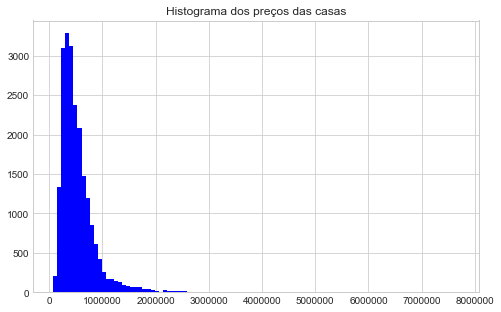

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df.price, bins=100, color='b')
plt.title('Histograma dos preços das casas')
plt.show()

### A maioria custa até 1 milhão de dólares

In [49]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#grafico de dispersão
trace = go.Scatter(x = df['yr_built'],
                   y = df['price'],
                   mode = 'markers')

# Armazenando gráfico em uma lista
data = [trace]
# Criando Layout
layout = go.Layout(title='Preços por ano de construção',
                   yaxis={'title':'Preço da casa'},
                   xaxis={'title': 'Ano de construção'})
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

In [50]:
#1 quarto
box1 = go.Box(y = df.loc[df['bedrooms'] == 1, 'price'],
                name = 'Casas com 1 quarto',
                marker = {'color': '#f39c12'})
#2 quartos
box2 = go.Box(y = df.loc[df['bedrooms'] == 2, 'price'],
                name = 'Casas com 2 quartos',
                marker = {'color': '#e67e22'})
#3 quartos
box3 = go.Box(y = df.loc[df['bedrooms'] == 3, 'price'],
                name = 'Casas com 3 quartos',
                marker = {'color': '#d35400'})

data = [box1, box2, box3]
layout = go.Layout(title = 'Dispersão de preços de acordo com número de quartos',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Número de quartos'},
                   yaxis = {'title': 'Preço'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

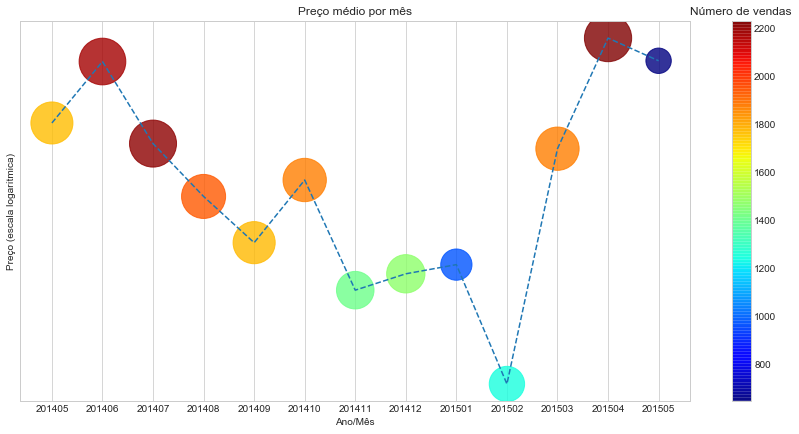

In [12]:
from matplotlib import colors
from matplotlib.colors import Normalize

df['year_month'] = (pd.DatetimeIndex(df['date']).year * 100 + pd.DatetimeIndex(df['date']).month).astype(str)

ym_summary = df.groupby('year_month')['price'].agg(['mean', 'count'])

vmin = np.min(ym_summary['count'])
vmax = np.max(ym_summary['count'])
norm = colors.Normalize(vmin, vmax)

plt.figure(figsize=(15,7))
plt.scatter(x=np.arange(ym_summary.shape[0]), y =ym_summary['mean'],c= ym_summary['count'],
            s= ym_summary['count'],norm=norm ,alpha = 0.8, cmap='jet')
        
plt.plot(np.arange(ym_summary.shape[0]), ym_summary['mean'] ,'--')
plt.xticks(np.arange(ym_summary.shape[0]),ym_summary.index.values)
plt.yscale('log')
plt.xlabel('Ano/Mês')
plt.ylabel('Preço (escala logarítmica)')
clb = plt.colorbar() 
clb.ax.set_title('Número de vendas')
plt.title('Preço médio por mês')
plt.show()

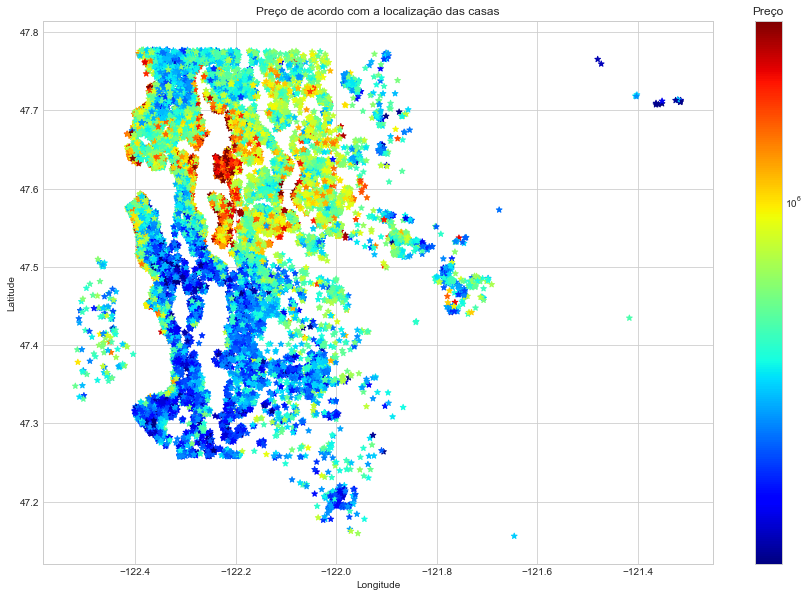

In [13]:
plt.figure(figsize=(15,10))
vmin = np.min(df.price)
vmax = np.max(df.price)
norm = colors.LogNorm(vmin*2,vmax/3)
plt.scatter(df.long,df.lat, marker='*',c=df.price,norm=norm,cmap='jet') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Preço de acordo com a localização das casas')
clb = plt.colorbar() 
clb.ax.set_title('Preço')
plt.show()

## Mapa real

Considerando o gráfico obtido e o mapa abaixo, pode-se observar que as casas com valor mais alto se concentram na parte norte, principalmente na região de Seattle e do Lake Washington.

![mapa](mapa_king_county.png)

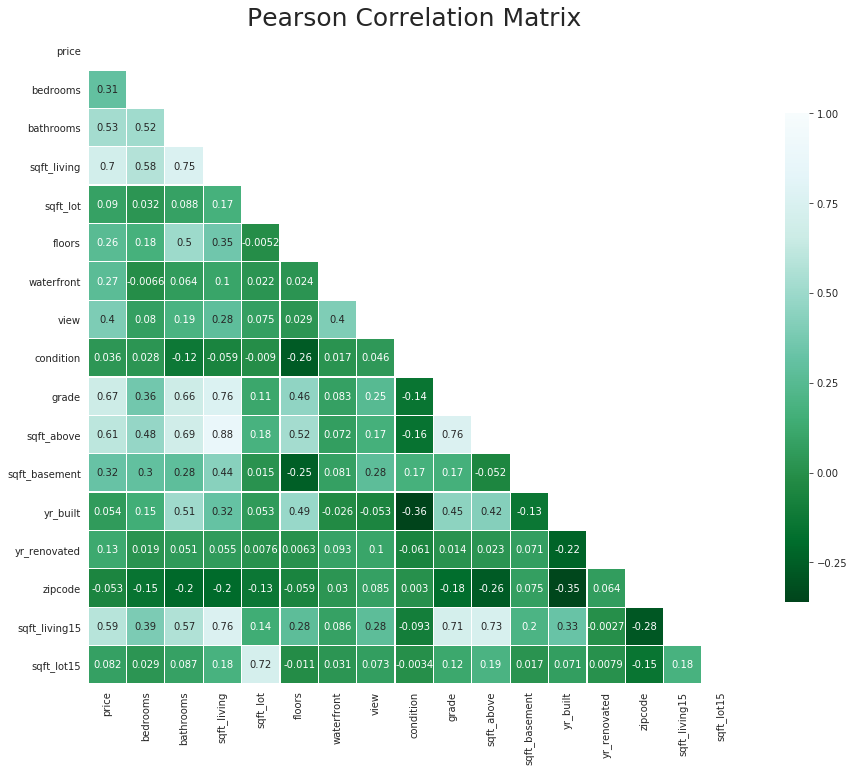

In [16]:
#correlação entre os atributos 
df.describe()
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built',
            'yr_renovated','zipcode','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

# Regressão Linear: Área Sala

In [31]:
# splitting data
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
# Linear Model 
lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
# fitting the linear model
lr.fit(X_train,y_train)

# Evaluate the simple model
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lr.score(X_train, y_train),'.3f')
rtesm = format(lr.score(X_test, y_test),'.3f')

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))


colunas = ['Model',
           'Details',
           'Mean Squared Error (MSE)',
           'R-squared (training)',
           'Adjusted R-squared (training)',
           'R-squared (test)',
           'Adjusted R-squared (test)',
]

evaluation = pd.DataFrame(columns=colunas)
r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Linear','Usando apenas a área da sala',msesm,rtrsm,'-',rtesm,'-']
evaluation


Average Price for Test Data: 539744.130
Intercept: -47235.811302901246
Coefficient: [282.2468152]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-


### Gráfico de predição dos dados: Área da Sala

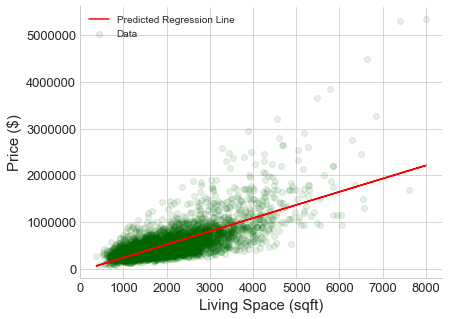

In [32]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
sns.set(style='white',font_scale=1)
plt.grid(True)

# Regressão Linear: com todas as características

In [33]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)


features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode', 'condition','sqft_above','sqft_basement',
            'yr_renovated','sqft_living15','sqft_lot15']

# splitting data
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
X_train = np.array(train_data[features2], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

# Evaluate the simple model
X_test = np.array(test_data[features2], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features2],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features2])
msecm2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
rtrcm2 = format(complex_model_2.score(train_data[features2],train_data['price']),'.3f')
artrcm2 = format(adjustedR2(complex_model_2.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rtecm2 = format(complex_model_2.score(test_data[features2],test_data['price']),'.3f')
artecm2 = format(adjustedR2(complex_model_2.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Linear','Todos atributos',msecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: 7581195.687772946
Coefficients: [-3.90558209e+04  4.73266082e+04  1.09888077e+02 -1.68869807e-02
  2.70221300e+04  5.58897092e+05  4.39464775e+04  1.18811216e+05
 -3.65330834e+03 -1.24644878e+01  1.88717472e+04  5.17810465e+01
  5.81070308e+01  1.29354522e+01  2.67680101e+01 -5.58769665e-01]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-


Usando atributos com alta correlação.

In [34]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)
features3 = ['sqft_living', 'sqft_above',
             'grade']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features3],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features3])
msecm2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
rtrcm2 = format(complex_model_2.score(train_data[features3],train_data['price']),'.3f')
artrcm2 = format(adjustedR2(complex_model_2.score(train_data[features3],train_data['price']),train_data.shape[0],len(features3)),'.3f')
rtecm2 = format(complex_model_2.score(test_data[features3],test_data['price']),'.3f')
artecm2 = format(adjustedR2(complex_model_2.score(test_data[features3],test_data['price']),test_data.shape[0],len(features3)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Linear','Atributos com alta correlação com o price',msecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: -654101.8370801521
Coefficients: [ 2.39544837e+02 -8.14784638e+01  1.09956008e+05]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-


Atributos com Baixa correlação, resultando em um baixo R-squared (test).

In [35]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)
features3 = ['zipcode', 'yr_built',
             'sqft_lot15']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features3],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features3])
msecm2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred2)),'.3f')
rtrcm2 = format(complex_model_2.score(train_data[features3],train_data['price']),'.3f')
artrcm2 = format(adjustedR2(complex_model_2.score(train_data[features3],train_data['price']),train_data.shape[0],len(features3)),'.3f')
rtecm2 = format(complex_model_2.score(test_data[features3],test_data['price']),'.3f')
artecm2 = format(adjustedR2(complex_model_2.score(test_data[features3],test_data['price']),test_data.shape[0],len(features3)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Linear','Atributos com baixa correlação com o price',msecm2,rtrcm2,artrcm2,rtecm2,artecm2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

Intercept: 20319202.69810505
Coefficients: [-208.9648717   356.62701115    1.01206571]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-
3,Regressão Linear,Atributos com baixa correlação com o price,355725.839,0.009,0.009,0.014,0.014


# Regressão Polinomial

In [36]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')

polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly2 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly2 = format(poly.score(X_testpoly,test_data['price']),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Polinomial','Grau 2',msepoly1,rtrpoly1,'-',rtepoly1,'-']
evaluation.loc[r+1] = ['Regressão Polinomial','Grau 3',msepoly2,rtrpoly2,'-',rtepoly2,'-']
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
4,Regressão Polinomial,Grau 2,254289.149,0.761,-,0.733,-
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
5,Regressão Polinomial,Grau 3,254289.149,0.810,-,0.595,-
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-
3,Regressão Linear,Atributos com baixa correlação com o price,355725.839,0.009,0.009,0.014,0.014


# Regressão KNN

In [37]:
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn1 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn1 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn1 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn1 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn2 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn2 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn2 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn2 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn2 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')


knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data[features2],train_data['price'])
pred = knnreg.predict(test_data[features2])

mseknn3 = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrknn3 = format(knnreg.score(train_data[features2],train_data['price']),'.3f')
artrknn3 = format(adjustedR2(knnreg.score(train_data[features2],train_data['price']),train_data.shape[0],len(features2)),'.3f')
rteknn3 = format(knnreg.score(test_data[features2],test_data['price']),'.3f')
arteknn3 = format(adjustedR2(knnreg.score(test_data[features2],test_data['price']),test_data.shape[0],len(features2)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','n_neighbors=15',mseknn1,rtrknn1,artrknn1,rteknn1,arteknn1]
evaluation.loc[r+1] = ['KNN Regression','n_neighbors=25',mseknn2,rtrknn2,artrknn2,rteknn2,arteknn2]
evaluation.loc[r+2] = ['KNN Regression','n_neighbors=27',mseknn3,rtrknn3,artrknn3,rteknn3,arteknn3]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
4,Regressão Polinomial,Grau 2,254289.149,0.761,-,0.733,-
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
5,Regressão Polinomial,Grau 3,254289.149,0.810,-,0.595,-
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
6,KNN Regression,n_neighbors=15,244120.954,0.564,0.564,0.536,0.534
7,KNN Regression,n_neighbors=25,247003.983,0.530,0.530,0.525,0.523
8,KNN Regression,n_neighbors=27,247652.291,0.525,0.525,0.522,0.521
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-
3,Regressão Linear,Atributos com baixa correlação com o price,355725.839,0.009,0.009,0.014,0.014


# Regressão Logística

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features2], df['price'], test_size=0.2, random_state=0)
RL = LogisticRegression()

# fitting the logistic model
RL.fit(X_train, y_train)

pred = RL.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(RL.score(X_train, y_train),'.3f')
rtesm = format(RL.score(X_test, y_test),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Regressão Logistica','-',msesm,rtrsm,'-',rtesm,'-']
evaluation


# Gradient Boosting

Gradient Boosting é um meta-algoritmo de aprendizado supervisionado que é geralmente utilizado em problemas de classificação e regressão. O principio algorítmico por trás é a produção de previsões/classificações derivadas de modelos preditivos fracos (Weak Learners), em especial árvores de decisão, essas que por sua vez são combinadas via ensemble learning (melhor performance preditiva) para redução de vieses dos algoritmos.

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation

#conjunto sem data nem id
df2 = df.drop(['date', 'id'], axis=1)

#tira o price do df2 e coloca em x
x = df2.drop(['price'], axis=1)
#coloca em y apenas o price
y = df2['price']

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y ,test_size=0.2)

gb = GradientBoostingRegressor(n_estimators=1000)
gb.fit(x_train,y_train)

score = gb.score(x_test,y_test)
pred = gb.predict(x_test)
exp_est = explained_variance_score(pred, y_test)

msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(gb.score(x_train, y_train),'.3f')
rtesm = format(gb.score(x_test, y_test),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
3,Regressão Linear,Atributos com baixa correlação com o price,355725.839,0.009,0.009,0.014,0.014
4,Regressão Polinomial,Grau 2,254289.149,0.761,-,0.733,-
5,Regressão Polinomial,Grau 3,254289.149,0.810,-,0.595,-
6,KNN Regression,n_neighbors=15,244120.954,0.564,0.564,0.536,0.534
7,KNN Regression,n_neighbors=25,247003.983,0.530,0.530,0.525,0.523
8,KNN Regression,n_neighbors=27,247652.291,0.525,0.525,0.522,0.521
9,Gradient Boosting,-,116485.298,0.958,-,0.898,-


# Random Forest 

O algoritmo Random Forest (floresta aleatória) cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e estabilidade. Pode ser usado para classificação e regressão.

In [39]:
#Random forest
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor,BaggingRegressor
rf = RandomForestRegressor()

#conjunto sem data nem id
df2 = df.drop(['date', 'id'], axis=1)

#tira o price do df2 e coloca em x
x = df2.drop(['price'], axis=1)
#coloca em y apenas o price
y = df2['price']

x_train, x_test = train_test_split(x,test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

rf.fit(x_train,y_train)

score2 = rf.score(x_test,y_test)
accu2 = cross_val_score(rf,x_train,y_train,cv=5)

msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(rf.score(x_train, y_train),'.3f')
rtesm = format(rf.score(x_test, y_test),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
3,Regressão Linear,Atributos com baixa correlação com o price,355725.839,0.009,0.009,0.014,0.014
4,Regressão Polinomial,Grau 2,254289.149,0.761,-,0.733,-
5,Regressão Polinomial,Grau 3,254289.149,0.810,-,0.595,-
6,KNN Regression,n_neighbors=15,244120.954,0.564,0.564,0.536,0.534
7,KNN Regression,n_neighbors=25,247003.983,0.530,0.530,0.525,0.523
8,KNN Regression,n_neighbors=27,247652.291,0.525,0.525,0.522,0.521
9,Gradient Boosting,-,116485.298,0.958,-,0.898,-


# Conclusão
Como o dataset possui uma dimensionalidade grande (muitos registros e atributos), o MSE ficou elevado. 

A tabela está ordenando pelo R-squared (utilizando o conjunto de teste), mostrando os melhores modelos de regressão.

In [40]:
evaluation.sort_values(by='R-squared (test)', ascending=[False])

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
9,Gradient Boosting,-,116485.298,0.958,-,0.898,-
10,Random Forest,-,517180.809,0.974,-,0.858,-
4,Regressão Polinomial,Grau 2,254289.149,0.761,-,0.733,-
1,Regressão Linear,Todos atributos,209931.105,0.653,0.653,0.657,0.655
5,Regressão Polinomial,Grau 3,254289.149,0.810,-,0.595,-
2,Regressão Linear,Atributos com alta correlação com o price,241261.690,0.540,0.540,0.547,0.546
6,KNN Regression,n_neighbors=15,244120.954,0.564,0.564,0.536,0.534
7,KNN Regression,n_neighbors=25,247003.983,0.530,0.530,0.525,0.523
8,KNN Regression,n_neighbors=27,247652.291,0.525,0.525,0.522,0.521
0,Regressão Linear,Usando apenas a área da sala,254289.149,0.492,-,0.496,-


PS: A Regressão Logística demorou muito para rodar e no final deu resultados muito ruins: `290388.246` e `0.034`

In [53]:
#grafico de dispersão
trace = go.Scatter(x = evaluation['Model'],
                   y = evaluation['R-squared (test)'],
                   mode = 'markers')

# Armazenando gráfico em uma lista
data = [trace]
# Criando Layout
layout = go.Layout(title='R² dos modelos de regressão utilizados',
                   yaxis={'title':'R²'},
                   xaxis={'title': 'Modelo'})
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)